In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
sys.path.append("/projects/b1198/epifluidlab/ravi/0130/headneck/scripts")
from loaders import HNSCCFeatureHandler
hc_data = HNSCCFeatureHandler("/projects/b1198/epifluidlab/ravi/0130/headneck/metadata/RAW_HNSCC_METADATA.csv", "/projects/b1198/epifluidlab/ravi/0130/headneck/notebooks/lists/valid_ids.txt")

In [2]:
_ = hc_data.load_feature_to_dataframe("/projects/b1198/epifluidlab/ravi/0130/headneck/data/hg38_frag_filtered/*.hg38.frag.delfi.bed", 1, 12)
z = hc_data.normalize_zscore()
_ = hc_data.merge_feature_metadata()

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


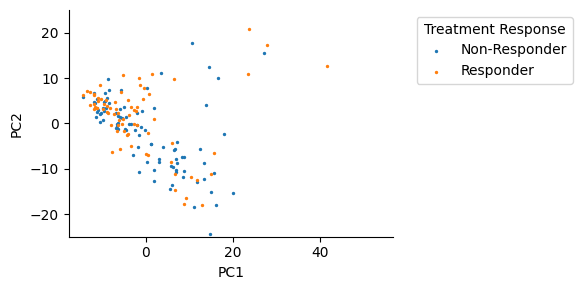

In [3]:
hc_data.pca("Treatment Response", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


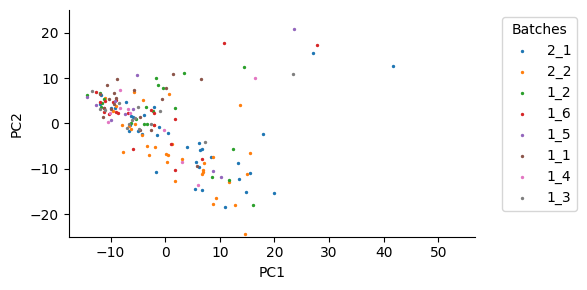

In [4]:
hc_data.pca("Batches", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


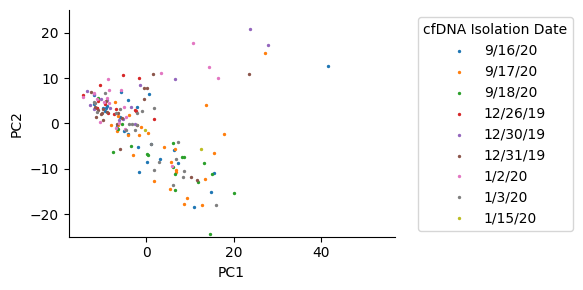

In [5]:
hc_data.pca("cfDNA Isolation Date", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


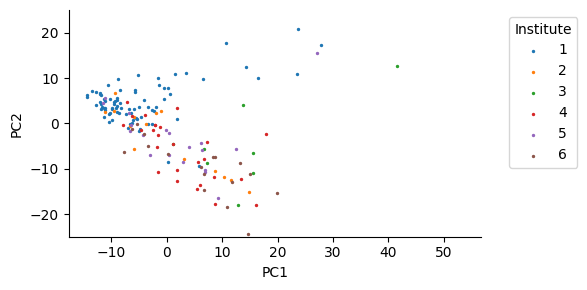

In [6]:
hc_data.pca("Institute", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


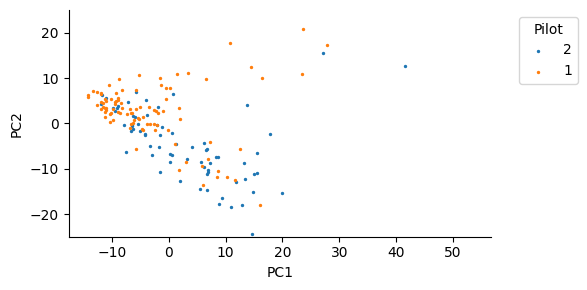

In [7]:
hc_data.pca("Pilot", scale=False)

In [8]:
z = hc_data.batch_correct()

                      Institute  Library_Prep_Date  cfDNA_Isolation_Date  \
Institute              1.000000          -0.465808              0.542575   
Library_Prep_Date     -0.465808           1.000000             -0.673446   
cfDNA_Isolation_Date   0.542575          -0.673446              1.000000   
Treatment_Response    -0.131130          -0.031933              0.290295   

                      Treatment_Response  
Institute                      -0.131130  
Library_Prep_Date              -0.031933  
cfDNA_Isolation_Date            0.290295  
Treatment_Response              1.000000  


/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


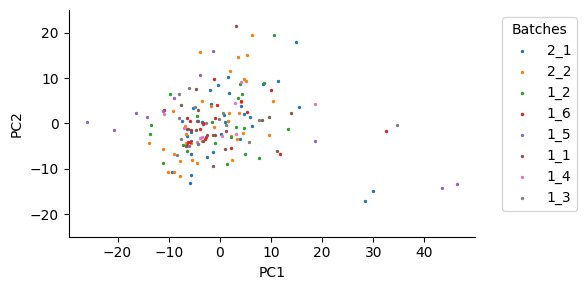

In [9]:
hc_data.pca("Batches", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


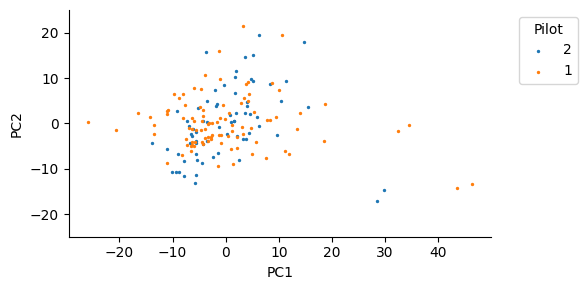

In [10]:
hc_data.pca("Pilot", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


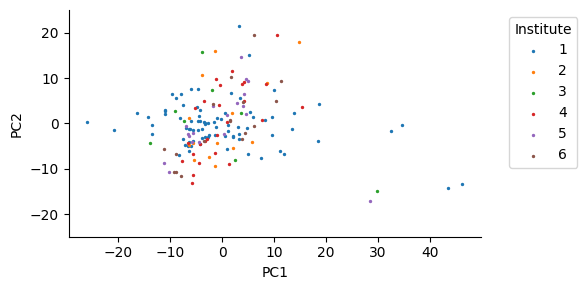

In [11]:
hc_data.pca("Institute", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)


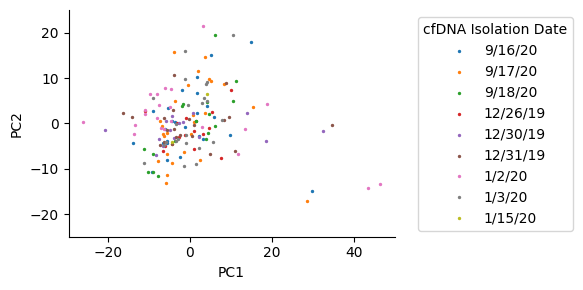

In [12]:
hc_data.pca("cfDNA Isolation Date", scale=False)

/projects/b1198/epifluidlab/ravi/0130/headneck/scripts/loaders.py:222: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label_l, s=2)
/home/myt8099/.conda/envs/bert/lib/python3.11/site-packages/matplotlib/patches.py:1566: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/home/myt8099/.conda/envs/bert/lib/python3.11/site-packages/matplotlib/patches.py:1567: FutureWarning: Series.__getitem__ treating keys as positions is depr

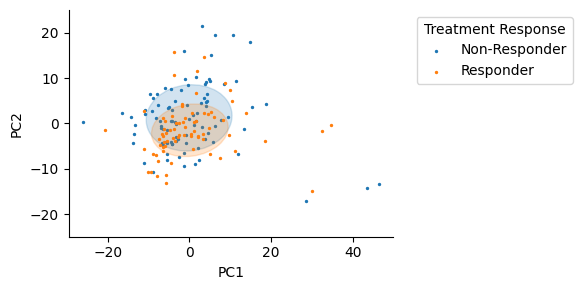

In [13]:
hc_data.pca("Treatment Response", scale=False, plot_ellipses=True)

In [14]:
responder_screen = hc_data.get_raw_features(hc_data.get_subset(hc_data.responder_ids, hc_data.screen_ids))
non_responder_screen = hc_data.get_raw_features(hc_data.get_subset(hc_data.non_responder_ids, hc_data.screen_ids))
responder_day0 = hc_data.get_raw_features(hc_data.get_subset(hc_data.responder_ids, hc_data.day0_ids))
non_responder_day0 = hc_data.get_raw_features(hc_data.get_subset(hc_data.non_responder_ids, hc_data.day0_ids))
responder_adj_wk1 = hc_data.get_raw_features(hc_data.get_subset(hc_data.responder_ids, hc_data.adjwk1_ids))
non_responder_adk_wk1 = hc_data.get_raw_features(hc_data.get_subset(hc_data.non_responder_ids, hc_data.adjwk1_ids))

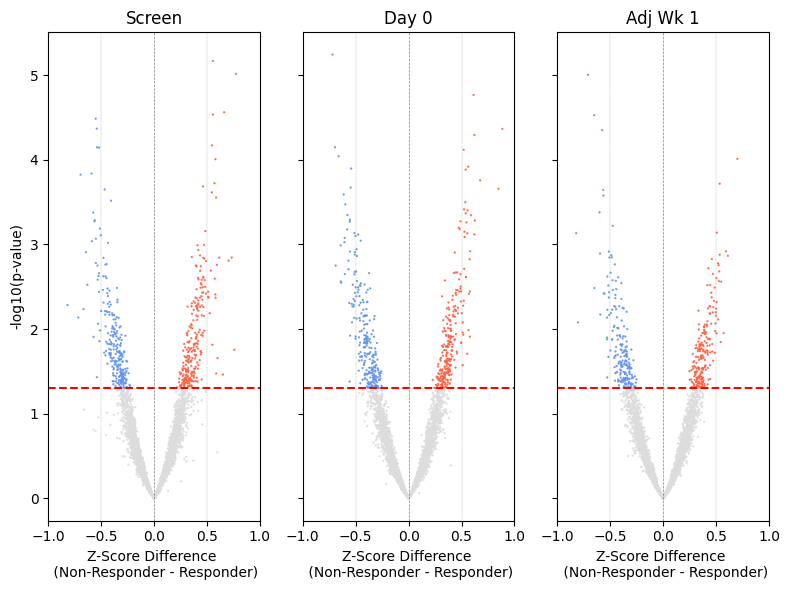

In [15]:
def create_volcano_plot(responder, nonresponder, ax, title, threshold=0.05):
    if set(responder.columns) != set(nonresponder.columns):
        raise ValueError("The columns are not the same between responder and nonresponder.")
    cols = responder.columns
    fold_changes = np.mean(nonresponder, axis=0) - np.mean(responder, axis=0)
    responder = responder.to_numpy()
    nonresponder = nonresponder.to_numpy()
    og_p_values = np.array([
        f_oneway(responder[:, i], nonresponder[:, i]).pvalue
        for i in range(responder.shape[1])
    ])
    volcano_df = pd.DataFrame({
        'FoldChange': fold_changes,
        'PValue': og_p_values
    })
    volcano_df.index=cols
    volcano_df['NegLog10PValue'] = -np.log10(volcano_df['PValue'])
    threshold_log = -np.log10(threshold)
    volcano_df['Color'] = 'gainsboro' 
    volcano_df.loc[
        (abs(volcano_df['FoldChange']) > 0) & (volcano_df['NegLog10PValue'] > threshold_log), 
        'Color'
    ] = volcano_df.apply(
        lambda row: 'cornflowerblue' if row['FoldChange'] < 0 else 'tomato',
        axis=1
    )
    sns.scatterplot(data=volcano_df, x='FoldChange', y='NegLog10PValue', hue='Color', palette={'cornflowerblue': 'cornflowerblue', 'tomato': 'tomato', 'gainsboro': 'gainsboro'},
                    edgecolor=None, s=2, ax=ax)
    ax.axhline(threshold_log, color='red', linestyle='--')
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=0.2)
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.2)
    ax.set_xlabel('Z-Score Difference \n (Non-Responder - Responder)')
    ax.set_ylabel('-log10(p-value)')
    ax.set_title(title)
    ax.set_xlim(-1, 1)
    ax.legend().remove()
    significant_indices = volcano_df.index[
        (volcano_df['NegLog10PValue'] > threshold_log) & 
        (abs(volcano_df['FoldChange']) > 0)
    ].tolist()
    return significant_indices
fig, axes = plt.subplots(1, 3, figsize=(8, 6), sharey=True)
significant_indices_screen = create_volcano_plot(responder_screen, non_responder_screen, axes[0], 'Screen')
significant_indices_screen = [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in significant_indices_screen]
df = pd.DataFrame(significant_indices_screen)
df.to_csv("cov_screen.tsv", sep="\t", index=False, header=False)
significant_indices_dayzero = create_volcano_plot(responder_day0, non_responder_day0, axes[1], 'Day 0')
significant_indices_dayzero = [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in significant_indices_dayzero]
df = pd.DataFrame(significant_indices_dayzero)
df.to_csv("cov_day0.tsv", sep="\t", index=False, header=False)
significant_indices_adjwk1 = create_volcano_plot(responder_adj_wk1, non_responder_adk_wk1, axes[2], 'Adj Wk 1')
significant_indices_adjwk1 = [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in significant_indices_adjwk1]
df = pd.DataFrame(significant_indices_adjwk1)
df.to_csv("cov_adjwk1.tsv", sep="\t", index=False, header=False)
plt.tight_layout()
plt.savefig('volcano_plot_coverage.png', dpi=1000, bbox_inches='tight')

In [16]:
screen = hc_data.get_subset(hc_data.screen_ids)
day0 = hc_data.get_subset(hc_data.day0_ids)
adjwk1 = hc_data.get_subset(hc_data.adjwk1_ids)

screen_labels = hc_data.get_metadata_col("Treatment Response", screen)
day0_labels = hc_data.get_metadata_col("Treatment Response", day0)
adjwk1_labels = hc_data.get_metadata_col("Treatment Response", adjwk1)

screen = hc_data.get_raw_features(screen)
day0 = hc_data.get_raw_features(day0)
adjwk1 = hc_data.get_raw_features(adjwk1)
data_sets = [(screen, screen_labels, 'screen'), (day0, day0_labels, 'day0'), (adjwk1, adjwk1_labels, 'adjwk1')]
def parse_feature_names(features):
    return [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in features]
for data, labels, name in data_sets:
    selector = SelectKBest(score_func=f_classif, k=100)
    selector.fit(data, labels)
    top_100_univariate = data.columns[selector.get_support()]
    top_100_univariate_parsed = parse_feature_names(top_100_univariate)
    stds = data.std().sort_values(ascending=False)
    top_100_std = stds.head(100).index
    top_100_std_parsed = parse_feature_names(top_100_std)
    pd.DataFrame(top_100_univariate_parsed).to_csv(f'100univ_{name}.tsv', sep='\t', index=False, header=False)
    pd.DataFrame(top_100_std_parsed).to_csv(f'100stddev_{name}.tsv', sep='\t', index=False, header=False)
    print(f"Saved 100univ_{name}.tsv and 100stddev_{name}.tsv")

Saved 100univ_screen.tsv and 100stddev_screen.tsv
Saved 100univ_day0.tsv and 100stddev_day0.tsv
Saved 100univ_adjwk1.tsv and 100stddev_adjwk1.tsv
